In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
%matplotlib inline

In [2]:
sample_window = pd.read_csv("C:/Users/hp/Desktop/Credit/data/CreditSampleWindow.csv",encoding="utf8")
sample_window.columns.values

array(['CID', 'STAGE_BEF', 'STAGE_AFT', 'START_DATE', 'CLOSE_DATE'],
      dtype=object)

In [3]:
sample_window.shape

(1813157, 5)

In [4]:


sample_window.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813157 entries, 0 to 1813156
Data columns (total 5 columns):
CID           object
STAGE_BEF     object
STAGE_AFT     object
START_DATE    float64
CLOSE_DATE    float64
dtypes: float64(2), object(3)
memory usage: 69.2+ MB


In [5]:
sample_window.head()

,CID,STAGE_BEF,STAGE_AFT,START_DATE,CLOSE_DATE
0,CID0128273,,M0,20170701.0,20170703.0
1,CID0214787,,M0,20180201.0,20180204.0
2,CID0287932,M4,M5,20180501.0,20180531.0
3,CID0351850,,M0,20161002.0,20161005.0
4,CID0217310,,M0,20150601.0,20150602.0


In [6]:
# 查看缺失值情况
sample_window.isnull().sum()/sample_window.shape[0]

CID           0.000000
STAGE_BEF     0.082451
STAGE_AFT     0.082451
START_DATE    0.082451
CLOSE_DATE    0.082451
dtype: float64

In [7]:
# 去除所有的完全重复行
sample_window.drop_duplicates(inplace=True)
sample_window.shape

(1813157, 5)

In [8]:
# 去除没有逾期阶段记录的信息
sample_window.dropna(subset=['STAGE_BEF','STAGE_AFT'], inplace=True)
sample_window.shape

(1663660, 5)

In [9]:
sample_window["START_MONTH"] = sample_window.START_DATE.apply(lambda x: int(x//100))
sample_window["CLOSE_MONTH"] = sample_window.CLOSE_DATE.apply(lambda x: int(x//100))

In [10]:
sample_window.STAGE_AFT.value_counts()

M0    1107267
M1     373910
M2      40034
M3      30199
M4      25442
M5      20923
M6      20575
M7      18326
M8      14387
M9      12597
Name: STAGE_AFT, dtype: int64

In [11]:
sample_window["AFT_FLAG"] = sample_window.STAGE_AFT.apply(lambda x: int(x[-1]))
sample_window.head()

,CID,STAGE_BEF,STAGE_AFT,START_DATE,CLOSE_DATE,START_MONTH,CLOSE_MONTH,AFT_FLAG
0,CID0128273,,M0,20170701.0,20170703.0,201707,201707,0
1,CID0214787,,M0,20180201.0,20180204.0,201802,201802,0
2,CID0287932,M4,M5,20180501.0,20180531.0,201805,201805,5
3,CID0351850,,M0,20161002.0,20161005.0,201610,201610,0
4,CID0217310,,M0,20150601.0,20150602.0,201506,201506,0


In [12]:
# 将 CLOSE_DATE 为空的数据填补为 201805。（根据数据缺失的业务背景确定）
sample_window.loc[sample_window.CLOSE_MONTH == 0,"CLOSE_MONTH"] = 201805

In [13]:
# 生成单个订单的流水
# 提取 ID、月份、月份对应状态作为新的数据

In [14]:
sample_window.head()

,CID,STAGE_BEF,STAGE_AFT,START_DATE,CLOSE_DATE,START_MONTH,CLOSE_MONTH,AFT_FLAG
0,CID0128273,,M0,20170701.0,20170703.0,201707,201707,0
1,CID0214787,,M0,20180201.0,20180204.0,201802,201802,0
2,CID0287932,M4,M5,20180501.0,20180531.0,201805,201805,5
3,CID0351850,,M0,20161002.0,20161005.0,201610,201610,0
4,CID0217310,,M0,20150601.0,20150602.0,201506,201506,0


In [15]:
#
overdue = sample_window.loc[:,["CID","START_MONTH","AFT_FLAG"]]\
                    .rename(columns={"START_MONTH":"CLOSE_MONTH"})\
                    .append(sample_window.loc[:,["CID","CLOSE_MONTH","AFT_FLAG"]],
                            ignore_index=True)

In [16]:
overdue.head(20)

,CID,CLOSE_MONTH,AFT_FLAG
0,CID0128273,201707,0
1,CID0214787,201802,0
2,CID0287932,201805,5
3,CID0351850,201610,0
4,CID0217310,201506,0
5,CID0010329,201701,7
6,CID0140008,201708,0
7,CID0066926,201702,0
8,CID0156186,201707,0
9,CID0362128,201605,1


In [17]:
# 生成每个订单的逾期信息
overdue = overdue.sort_values(by=["CID","CLOSE_MONTH","AFT_FLAG"]).drop_duplicates(subset=["CID","CLOSE_MONTH"],keep="last").set_index(["CID","CLOSE_MONTH"]).unstack(1)
overdue.columns = overdue.columns.droplevel()


In [18]:
overdue.head()

CLOSE_MONTH,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512,...,201708,201709,201710,201711,201712,201801,201802,201803,201804,201805
CID,,,,,,,,,,,,,,,,,,,,,
CID0000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CID0000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CID0000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
CID0000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,0.0,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,NaN
CID0000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [19]:
import collections
def get_mat(df):
    """
    构建转移矩阵，索引表示转移前的逾期状态，
    列名表示转移后的逾期状态。
    """
    trans_mat = pd.DataFrame(data=0,columns=range(0,10),index=range(0,10))
    counter = collections.Counter()

    for i,j in zip(df.columns,df.columns[1:]):
        select = (df[i].notnull()) & (df[j].notnull())
        counter += collections.Counter(tuple(x) for x in df.loc[select, [i,j]].values)
    for key in counter.keys():
        trans_mat.loc[key[0],key[1]] = counter[key]
    trans_mat["all_count"] = trans_mat.apply(sum, axis=1)
    bad_count = []
    for j in range(10):
        bad_count.append(trans_mat.iloc[j,j+1:10].sum())
    trans_mat["bad_count"] = bad_count
    trans_mat["to_bad"] = trans_mat["bad_count"]/trans_mat["all_count"]
    return trans_mat


In [20]:
get_mat(overdue)

,0,1,2,3,4,5,6,7,8,9,all_count,bad_count,to_bad
0,218269,78639,3232,0,0,0,0,0,2,2,300144,81875,0.272786
1,59218,169811,20351,9020,0,16,8,8,2,6,258440,29411,0.113802
2,556,4061,3775,17287,7,0,0,0,0,0,25686,17294,0.673285
3,184,1233,586,1686,22226,446,0,0,0,2,26363,22674,0.860069
4,1,20,5,0,233,13634,2803,8,0,0,16704,16445,0.984495
5,0,2,2,0,0,211,14936,911,0,0,16062,15847,0.986614
6,0,0,0,2,0,0,179,17223,9,8,17421,17240,0.989610
7,0,8,0,0,8,0,8,1292,14262,4,15582,14266,0.915544
8,2,2,0,0,0,0,2,4,98,12527,12635,12527,0.991452
9,0,10,2,4,0,4,8,12,22,247,309,0,0.000000


In [21]:
# 读取订单的首次动用日期信息表
first_use = pd.read_csv("C:/Users/hp/Desktop/Credit/data/CreditFirstUse.csv",encoding="utf8")

In [22]:
first_use.set_index("CID",inplace=True)

In [23]:
first_use.head()

,FST_USE_DT
CID,
CID0092102,20161116
CID0111878,20161118
CID0264977,20161120
CID0059996,20160907
CID0057096,20160910


In [24]:
first_use["FST_USE_MONTH"] = first_use.FST_USE_DT.map(lambda x:x//100)
first_use.head()

,FST_USE_DT,FST_USE_MONTH
CID,,
CID0092102,20161116,201611
CID0111878,20161118,201611
CID0264977,20161120,201611
CID0059996,20160907,201609
CID0057096,20160910,201609


In [25]:
overdue.head()

CLOSE_MONTH,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512,...,201708,201709,201710,201711,201712,201801,201802,201803,201804,201805
CID,,,,,,,,,,,,,,,,,,,,,
CID0000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CID0000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CID0000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
CID0000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,0.0,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,NaN
CID0000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [26]:
# 计算每笔订单第一次出现逾期的月份索引位置
def get_first_overdue(ser):
    array = np.where(ser >= 2)[0]
    if array.size > 0:
        return array[0]
    else:
        return np.nan

In [27]:
get_first_overdue

<function __main__.get_first_overdue>

In [28]:
OVERDUE_INDEX = overdue.apply(get_first_overdue,axis=1)


In [29]:
first_use["OVERDUE_INDEX"] = OVERDUE_INDEX

In [30]:
first_use.head()

,FST_USE_DT,FST_USE_MONTH,OVERDUE_INDEX
CID,,,
CID0092102,20161116,201611,NaN
CID0111878,20161118,201611,NaN
CID0264977,20161120,201611,NaN
CID0059996,20160907,201609,NaN
CID0057096,20160910,201609,NaN


In [31]:
first_use["START_INDEX"] = first_use.FST_USE_MONTH.map({k:v 
                                                for v,k in enumerate(overdue.columns)})

In [32]:
first_use.head()

,FST_USE_DT,FST_USE_MONTH,OVERDUE_INDEX,START_INDEX
CID,,,,
CID0092102,20161116,201611,NaN,20.0
CID0111878,20161118,201611,NaN,20.0
CID0264977,20161120,201611,NaN,20.0
CID0059996,20160907,201609,NaN,18.0
CID0057096,20160910,201609,NaN,18.0


In [33]:
first_use.loc[first_use.OVERDUE_INDEX.notnull()].head()

,FST_USE_DT,FST_USE_MONTH,OVERDUE_INDEX,START_INDEX
CID,,,,
CID0082006,20160906,201609,26.0,18.0
CID0383647,20160906,201609,29.0,18.0
CID0006192,20161022,201610,28.0,19.0
CID0348120,20161122,201611,33.0,20.0
CID0155834,20161123,201611,28.0,20.0


In [34]:
# 查看异常数据
first_use[first_use.OVERDUE_INDEX < first_use.START_INDEX]

,FST_USE_DT,FST_USE_MONTH,OVERDUE_INDEX,START_INDEX
CID,,,,
CID0164451,20170722,201707,9.0,28.0


In [35]:
sample_window.loc[sample_window.CID=="CID0164451",:]

,CID,STAGE_BEF,STAGE_AFT,START_DATE,CLOSE_DATE,START_MONTH,CLOSE_MONTH,AFT_FLAG
1115857,CID0164451,M1,M2,20151201.0,20151225.0,201512,201512,2
1298974,CID0164451,,M0,20151101.0,20151104.0,201511,201511,0
1462710,CID0164451,M0,M1,20151104.0,20151201.0,201511,201512,1
1796143,CID0164451,,M0,20170101.0,20170102.0,201701,201701,0


In [36]:
# 仅有一条处理时删除即可
month_count = (first_use.OVERDUE_INDEX - first_use.START_INDEX)\
                    .value_counts().sort_index()[1:]

In [37]:
month_count

1.0        1
2.0      231
3.0      498
4.0      843
5.0     1078
6.0     1457
7.0     1647
8.0     2039
9.0     2000
10.0    1824
11.0    1768
12.0    1719
13.0    1587
14.0    1473
15.0    1318
16.0    1338
17.0    1149
18.0    1107
19.0    1048
20.0     855
21.0     878
22.0     657
23.0     532
24.0     552
25.0     454
26.0     426
27.0     333
28.0     342
29.0     321
30.0     293
31.0     261
32.0     207
33.0     216
34.0     160
35.0     140
36.0     128
37.0     110
38.0      51
dtype: int64

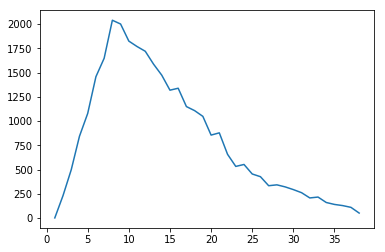

In [38]:
month_count.plot()

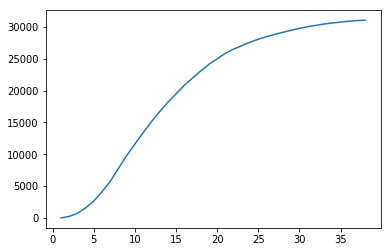

In [39]:
month_count.cumsum().plot()

In [40]:
# 载入数据
train_data = pd.read_csv("C:/Users/hp/Desktop/Credit/data/cs-training.csv",index_col=0)
# 查看数据分布
train_data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.0,0.002969,0.029867,0.154181,0.559046,0.981278,1.092956,50708.0
age,150000.0,52.295207,14.771866,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.0,0.030874,0.175074,0.366508,0.868254,1267.000000,4979.040000,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,0.0,2005.000000,3400.000000,5400.000000,8249.000000,11666.000000,25000.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [42]:
train_data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

In [43]:
train_data.drop_duplicates(inplace=True)

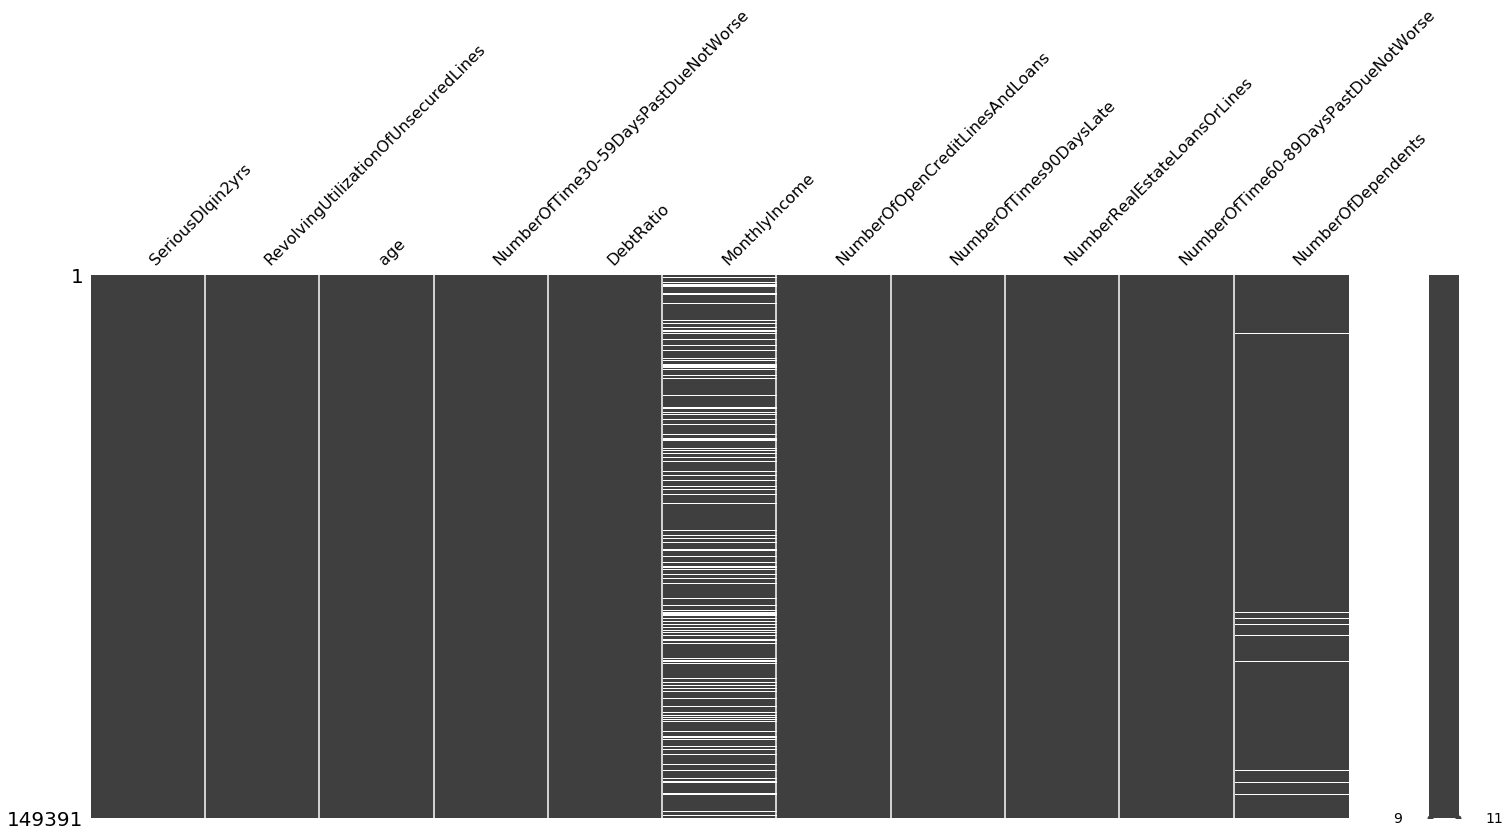

In [44]:
import missingno as msno
msno.matrix(train_data)

In [45]:
from sklearn.ensemble import RandomForestRegressor
def fill_missing(data,to_fill):
    df = data.copy()
    columns = [*train_data.columns]
    columns.remove(to_fill)
    # 移除有缺失值的列
    columns.remove("NumberOfDependents")
    X = df.loc[:,columns]
    y = df.loc[:,to_fill]
    X_train = X.loc[df[to_fill].notnull()]
    X_pred = X.loc[df[to_fill].isnull()]
    y_train = y.loc[df[to_fill].notnull()]
    model = RandomForestRegressor(random_state=0,
        n_estimators=200,
        max_depth=3,
        n_jobs=-1)
    model.fit(X_train,y_train)
    pred = model.predict(X_pred).round()
    df.loc[df[to_fill].isnull(), to_fill] = pred
    return df
train_data = fill_missing(train_data,"MonthlyIncome")

In [46]:
train_data.dropna(inplace=True)

In [47]:
train_data = train_data.loc[train_data.age>0]

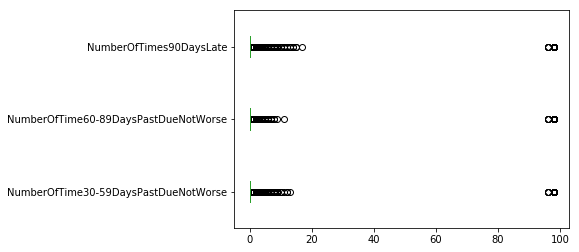

In [48]:
columns = ["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTimes90DaysLate"]
train_data[columns].plot.box(vert=False)

In [49]:
for col in columns:
    train_data = train_data.loc[train_data[col] < 90]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145354 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        145354 non-null int64
RevolvingUtilizationOfUnsecuredLines    145354 non-null float64
age                                     145354 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    145354 non-null int64
DebtRatio                               145354 non-null float64
MonthlyIncome                           145354 non-null float64
NumberOfOpenCreditLinesAndLoans         145354 non-null int64
NumberOfTimes90DaysLate                 145354 non-null int64
NumberRealEstateLoansOrLines            145354 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    145354 non-null int64
NumberOfDependents                      145354 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.3 MB


In [50]:
from sklearn.model_selection import train_test_split
Y = train_data['SeriousDlqin2yrs']
X = train_data.iloc[:, 1:]
X_train, X_vali, Y_train, Y_vali = train_test_split(X, Y, test_size=0.3)
model_data = pd.concat([Y_train, X_train], axis=1)
vali_data = pd.concat([Y_vali, X_vali], axis=1)

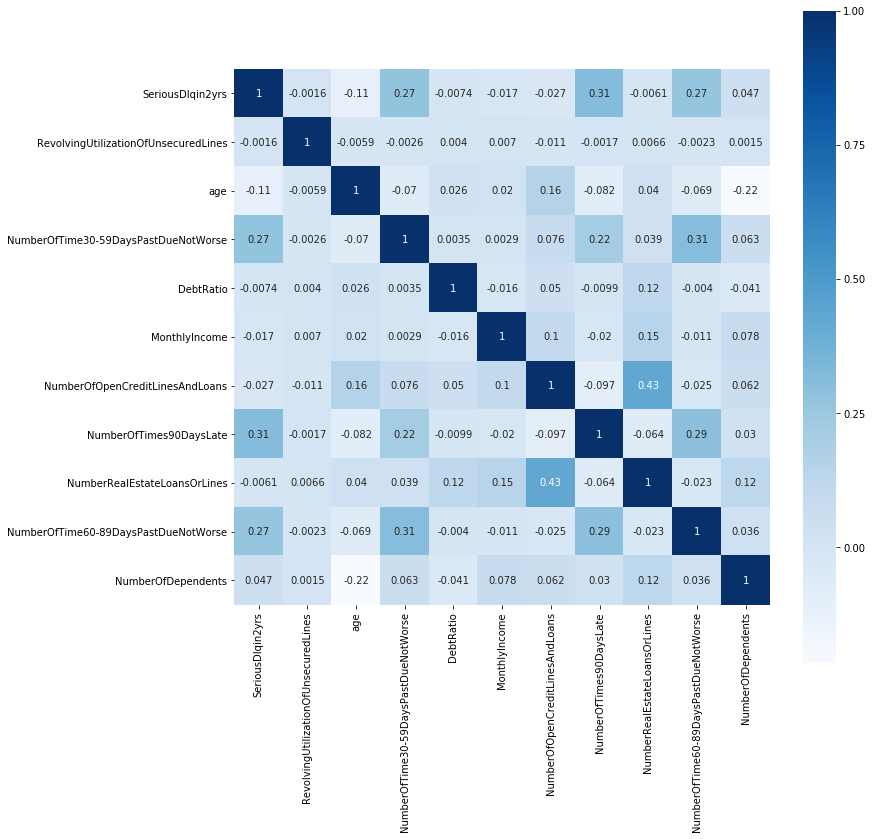

In [51]:
corr = train_data.corr()
plt.subplots(figsize=(12, 12))
sns.heatmap(corr, annot=True, vmax=1, square=True, cmap='Blues')
plt.show()

In [52]:
from auto_bin import auto_bin
# 对每一个分组进行分析，选择合适的分箱个数
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [53]:
# 用于确定最优分箱的个数和区间
age_bins_df = auto_bin(model_data,
                       "age",
                       "SeriousDlqin2yrs", n=4,iv=True,detail=False,q=20)
age_bins_df

age 分19组 IV 值:  0.25121511216741255
age 分18组 IV 值:  0.25121056732839203
age 分17组 IV 值:  0.25119704221672284
age 分16组 IV 值:  0.25116366025237336
age 分15组 IV 值:  0.25114299739906665
age 分14组 IV 值:  0.25108926699880113
age 分13组 IV 值:  0.2510450821462722
age 分12组 IV 值:  0.2509223855682811
age 分11组 IV 值:  0.25072588178155997
age 分10组 IV 值:  0.25046269508677776
age 分 9组 IV 值:  0.2501573360059734
age 分 8组 IV 值:  0.24928061954809633
age 分 7组 IV 值:  0.24815618278052148
age 分 6组 IV 值:  0.24668746640189085
age 分 5组 IV 值:  0.243002068878755
age 分 4组 IV 值:  0.23989892519838962


,min,max,count_0,count_1,total,percentage,bad_rate,woe
0,21.0,41.0,23142,2667,25809,0.253659,0.103336,-0.467536
1,41.0,54.0,29459,2523,31982,0.314329,0.078888,-0.170680
2,54.0,62.0,17773,975,18748,0.184261,0.052006,0.274768
3,62.0,103.0,24521,687,25208,0.247752,0.027253,0.946720


In [54]:
age_bins_df = auto_bin(model_data,
                       "RevolvingUtilizationOfUnsecuredLines",
                       "SeriousDlqin2yrs", n=4,iv=True,detail=False,q=20)
age_bins_df

RevolvingUtilizationOfUnsecuredLines 分18组 IV 值:  1.1305210806989328
RevolvingUtilizationOfUnsecuredLines 分17组 IV 值:  1.1305131208153745
RevolvingUtilizationOfUnsecuredLines 分16组 IV 值:  1.1304868970706607
RevolvingUtilizationOfUnsecuredLines 分15组 IV 值:  1.1304760532772344
RevolvingUtilizationOfUnsecuredLines 分14组 IV 值:  1.1302972871057393
RevolvingUtilizationOfUnsecuredLines 分13组 IV 值:  1.1300644452240975
RevolvingUtilizationOfUnsecuredLines 分12组 IV 值:  1.1297911692798928
RevolvingUtilizationOfUnsecuredLines 分11组 IV 值:  1.128470785263068
RevolvingUtilizationOfUnsecuredLines 分10组 IV 值:  1.1237213510455275
RevolvingUtilizationOfUnsecuredLines 分 9组 IV 值:  1.1211144859317876
RevolvingUtilizationOfUnsecuredLines 分 8组 IV 值:  1.1188524874966879
RevolvingUtilizationOfUnsecuredLines 分 7组 IV 值:  1.1069095827305597
RevolvingUtilizationOfUnsecuredLines 分 6组 IV 值:  1.0948300514600926
RevolvingUtilizationOfUnsecuredLines 分 5组 IV 值:  1.0858009327982314
RevolvingUtilizationOfUnsecuredLines 分 4组 IV 值:  

,min,max,count_0,count_1,total,percentage,bad_rate,woe
0,0.000000,0.210307,54780,1181,55961,0.550001,0.021104,1.208733
1,0.210307,0.691690,23796,1640,25436,0.249993,0.064476,0.046591
2,0.691690,1.000000,14933,3170,18103,0.177922,0.175109,-1.078388
3,1.000000,50708.000000,1386,861,2247,0.022084,0.383178,-2.152148


In [55]:
age_bins_df = auto_bin(model_data,
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "SeriousDlqin2yrs", n=4,iv=True,detail=False,q=20)
age_bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,woe
0,0.0,1.0,91307,5142,96449,0.94793,0.053313,0.248555
1,1.0,2.0,2335,868,3203,0.03148,0.270996,-1.638655
2,2.0,13.0,1253,842,2095,0.02059,0.401909,-2.230714


In [56]:
# 分析过程中的结果也我们手动完成分箱的添加
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":5,
        "age":5,
        "DebtRatio":5,
        "MonthlyIncome":6,
        "NumberOfOpenCreditLinesAndLoans":4}

In [57]:
# 不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13],
"NumberOfTimes90DaysLate":[0,1,2,17],
"NumberRealEstateLoansOrLines":[0,1,2,4,54],
"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8],
            "NumberOfDependents":[0,1,2,3]}



In [58]:
# 保证区间覆盖使用 np.inf 替换最大值    然后添加一个最小值 -np.inf 
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [59]:
hand_bins

{'NumberOfDependents': [-inf, 0, 1, 2, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf]}

In [60]:
auto_col_bins

{'DebtRatio': 5,
 'MonthlyIncome': 6,
 'NumberOfOpenCreditLinesAndLoans': 4,
 'RevolvingUtilizationOfUnsecuredLines': 5,
 'age': 5}

In [61]:
# 用于辅助确定手动分箱的个数和区间
# model_data["NumberOfTime60-89DaysPastDueNotWorse"].value_counts()
# 用来保存每个分组的分箱数据
bins_of_col = {}
# 生成自动分箱的分箱区间和分箱后的 IV 值
for col in auto_col_bins:
    # print(col)
    bins_df = auto_bin(model_data, col,"SeriousDlqin2yrs",
                   n=auto_col_bins[col],
                   iv=False,detail=False,q=20)
    bins_list = list(sorted(set(bins_df["min"])\
                .union(bins_df["max"])))
    # 保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list
    # 合并手动分箱数据
    bins_of_col.update(hand_bins)

In [62]:
# 合并手动分箱数据
bins_of_col.update(hand_bins)

In [63]:
# 计算分箱数据的 IV 值
def get_iv(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    bins_df["woe"] = np.log((bins_df[0] / bins_df[0].sum()) /
                    (bins_df[1] / bins_df[1].sum()))
    iv = np.sum((bins_df[0] / bins_df[0].sum() -
    bins_df[1] / bins_df[1].sum())*bins_df.woe)
    return iv ,bins_df

In [64]:
# 保存 IV 值信息
info_values = {}
# 保存 woe 信息
woe_values = {}
for col in bins_of_col:
    iv_woe = get_iv(model_data,col,
        "SeriousDlqin2yrs",
        bins_of_col[col])
    info_values[col],woe_values[col] = iv_woe

In [65]:
def plt_iv(info_values):
    keys,values = zip(*info_values.items())
    nums = range(len(keys))
    plt.barh(nums,values)
    plt.yticks(nums,keys)
    for i, v in enumerate(values):
        plt.text(v, i-.2, f"{v:.3f}")

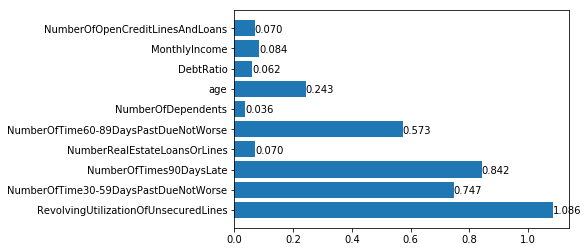

In [66]:
plt_iv(info_values)

In [67]:
woe_values

{'DebtRatio': SeriousDlqin2yrs      0     1       woe
 cut                                    
 (-inf, 0.404]     52663  3298  0.142366
 (0.404, 0.519]     9433   741 -0.084262
 (0.519, 1.367]    13680  1582 -0.470985
 (1.367, 1153.0]    9448   728 -0.064973
 (1153.0, inf]      9671   503  0.328066,
 'MonthlyIncome': SeriousDlqin2yrs      0     1       woe
 cut                                    
 (-inf, 1127.0]     9200   700 -0.052352
 (1127.0, 2128.9]   4789   573 -0.505039
 (2128.9, 2340.0]   7798   397  0.349456
 (2340.0, 4500.0]  20912  2049 -0.305259
 (4500.0, 6633.0]  18343  1385 -0.044683
 (6633.0, inf]     33853  1748  0.335325,
 'NumberOfDependents': SeriousDlqin2yrs      0     1       woe
 cut                                    
 (-inf, 0.0]       56843  3508  0.157017
 (0.0, 1.0]        17128  1338 -0.078692
 (1.0, 2.0]        12487  1135 -0.230175
 (2.0, inf]         8437   871 -0.357490,
 'NumberOfOpenCreditLinesAndLoans': SeriousDlqin2yrs      0     1       woe
 cut    

In [68]:
model_woe = pd.DataFrame(index=model_data.index)
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col])\
        .map(woe_values[col]["woe"])
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]
model_woe.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,SeriousDlqin2yrs
130595,-1.078388,0.543158,0.374713,0.249150,0.276166,-0.230175,-0.574721,0.142366,-0.044683,0.162055,0
132201,1.208733,0.543158,0.374713,-0.248761,0.276166,-0.078692,0.946720,0.142366,-0.305259,0.162055,0
33978,-2.152148,-0.924603,0.374713,-0.248761,0.276166,0.157017,-0.574721,0.142366,-0.305259,-0.030908,0
103623,1.208733,0.543158,0.374713,0.227814,0.276166,0.157017,0.946720,-0.470985,-0.052352,0.162055,0
146726,1.208733,0.543158,0.374713,0.249150,0.276166,0.157017,0.274768,-0.064973,0.349456,-0.038825,0


In [69]:
import statsmodels.api as sm
data = pd.read_csv('C:/Users/hp/Desktop/Credit/WoeData.csv',encoding="utf8")
# 设置因变量
endog = data['SeriousDlqin2yrs']
X = data.drop(["SeriousDlqin2yrs",
"NumberRealEstateLoansOrLines",
"NumberOfDependents"],axis=1)
# 设置自变量
exog = sm.add_constant(X)
logit = sm.Logit(endog,exog)
result = logit.fit()
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
result.summary()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.194132
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               101747
Model:                          Logit   Df Residuals:                   101738
Method:                           MLE   Df Model:                            8
Date:                Sat, 09 Mar 2019   Pseudo R-squ.:                  0.2128
Time:                        20:56:33   Log-Likelihood:                -19752.
converged:                       True   LL-Null:                       -25092.
                                        LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.6102      0.015   -175.732      0.000      -2.639      -2.581
RevolvingUtilizationOfUnsecuredLines    -0.7278      0.014    -50.841      0.000      -0.756      -0.700
age                                     -0.4742      0.032    -14.842      0.000      -0.537      -0.412
DebtRatio                               -0.6360      0.055    -11.640      0.000      -0.743      -0.529
MonthlyIncome                           -0.3418      0.050     -6.832      0.000      -0.440      -0.244
NumberOfOpenCreditLinesAndLoans         -0.3049      0.050     -6.151      0.000      -0.402      -0.208
NumberOfTime30-59DaysPastDueNotWorse    -0.6416      0.018    -35.595      0.000      -0.677      -0.606
NumberOfTimes90DaysLate                 -0.5819      0.018    -32.116      0.000      -0.617      -0.546
NumberOfTime60-89DaysPastDueNotWorse    -0.4535      0.026    -17.215      0.000      -0.505      -0.402
========================================================================================================
"""

In [70]:
vali_woe = pd.DataFrame(index=vali_data.index)
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col])\
            .map(woe_values[col]["woe"])
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]
vali_Y = vali_woe['SeriousDlqin2yrs']
vali_X = vali_woe.drop(["SeriousDlqin2yrs",
    "NumberRealEstateLoansOrLines",
    "NumberOfDependents"],axis=1)
vali_exog = sm.add_constant(vali_X)
vali_proba = result.predict(vali_exog)

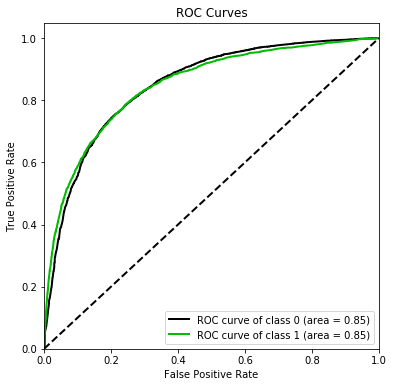

In [71]:
# 预测结果为对应 1 的概率，转换为数组用于绘图
vali_proba_df = pd.DataFrame(vali_proba,columns=[1])
vali_proba_df.insert(0,0,1-vali_proba_df)
skplt.metrics.plot_roc(vali_Y, vali_proba_df,
    plot_micro=False,figsize=(6,6),
    plot_macro=False);

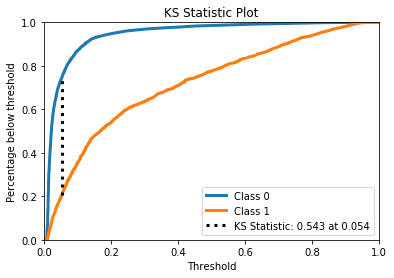

In [72]:
skplt.metrics.plot_ks_statistic(vali_Y,vali_proba_df)

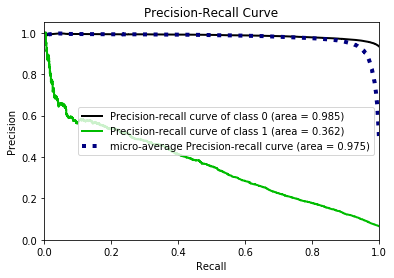

In [73]:
skplt.metrics.plot_precision_recall(vali_Y,vali_proba_df)

In [74]:
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
A,B

(481.8621880878296, 28.85390081777927)

In [75]:
result.params


const                                  -2.610194
RevolvingUtilizationOfUnsecuredLines   -0.727790
age                                    -0.474183
DebtRatio                              -0.636039
MonthlyIncome                          -0.341809
NumberOfOpenCreditLinesAndLoans        -0.304920
NumberOfTime30-59DaysPastDueNotWorse   -0.641558
NumberOfTimes90DaysLate                -0.581870
NumberOfTime60-89DaysPastDueNotWorse   -0.453455
dtype: float64

In [76]:
base_score = A - B*result.params["const"]
base_score


557.176452719877

In [77]:
file = "ScoreData.csv"
with open(file,"w") as fdata: 
    fdata.write(f"base_score,{base_score}\n") 
for col in result.params.index[1:]:
    score = woe_values[col]["woe"] * (-B*result.params[col]) 
    score.name = "Score"
    score.index.name = col 
    score.to_csv(file,header=True,mode="a")
